# simple classification algorithms

In [1]:
import os
import pandas as pd

load iris dataset from UCI machine learning repository.

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, encoding="utf-8")
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


first 50 samples belong to *setosa* and the next 50 samples belong to *versicolor*. column index 0 and 2 represent *SepalLengthCm* and *PetalLengthCm* respectively.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
X = df.iloc[0:100, [0, 2]].to_numpy(dtype="float32")
y = df.iloc[0:100, 4].to_numpy()
y = np.where(y == "Iris-setosa", -1, 1)

display scatter plot of iris dataset.

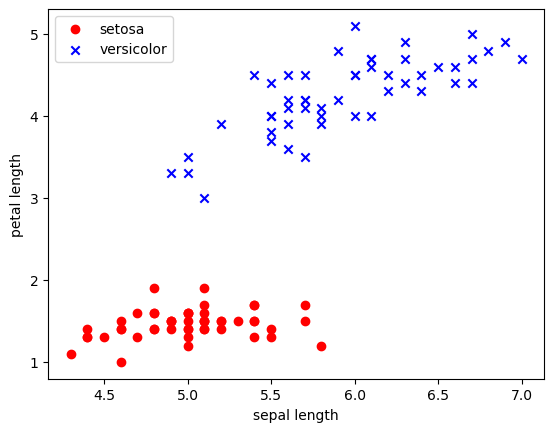

In [10]:
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")
plt.show()

create a **Perceptron** API using python class.

In [11]:
class Perceptron(object):
    """
    lr: learning rate
    epochs: number of iterations
    random_state: seed
    """
    def __init__(self, lr=0.01, epochs=50, random_state=1):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state
    
    """
    X: training dataset
    y: target values
    """
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        w_size = 1 + X.shape[1]
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=w_size)
        self.errors_ = []
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

train Perceptron model using iris dataset.

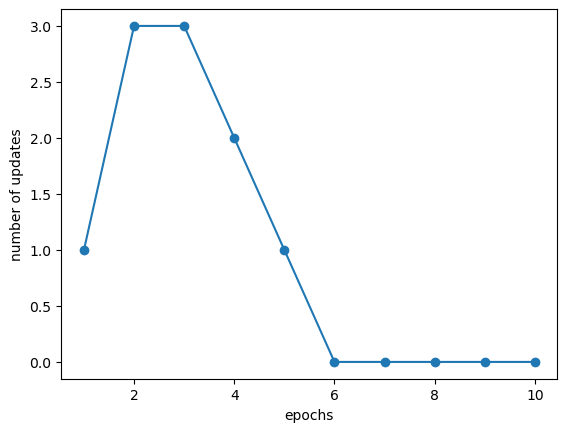

In [12]:
ppn = Perceptron(lr=0.1, epochs=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('epochs')
plt.ylabel('number of updates')
plt.show()

visualize 2-dimensional decision boundary of the iris dataset.

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, classifier, step=0.02, test_idx=None):
    markers = ("s", "x", "o", "^", "v")
    colors = ["red", "blue", "lightgreen", "gray", "cyan"]
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    # np.meshgrid returns coordinate matrices from coordinate vectors
    x1_coordinates, x2_coordinates = np.meshgrid(np.arange(x1_min - 1, x1_max + 1, step),
                                                 np.arange(x2_min - 1, x2_max + 1, step))
    # transpose an array using np.array.T
    Z = classifier.predict(np.array([x1_coordinates.ravel(), x2_coordinates.ravel()]).T)
    Z = Z.reshape(x1_coordinates.shape)
    plt.contourf(x1_coordinates, x2_coordinates, Z, alpha=0.3, cmap=cmap)
    plt.xlim(x1_coordinates.min(), x1_coordinates.max())
    plt.ylim(x2_coordinates.min(), x2_coordinates.max())

    for idx, cl in enumerate(np.unique(y)):
        # boolean masking
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl)

    # plot test data if passed
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], facecolor='none', edgecolor='black',
                    alpha=1.0, linewidth=1, marker='o', s=100, label='test')

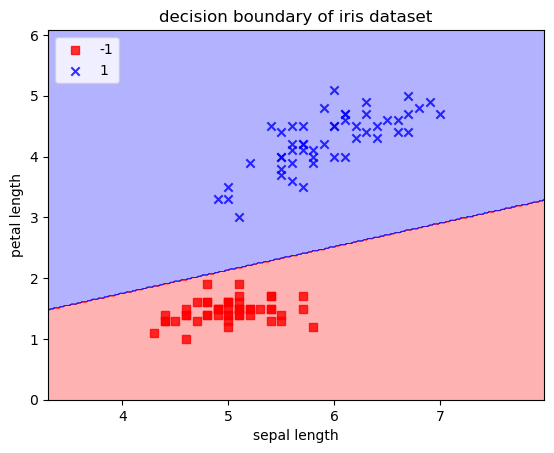

In [14]:
plot_decision_boundary(X, y, classifier=ppn)
plt.title("decision boundary of iris dataset")
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")
plt.show()

create **Adaline gradient descent** API using python class. 

In [17]:
class AdalineGD(object):
    """
    lr: learning rate
    epochs: number of iterations
    random_state: seed
    """
    def __init__(self, lr=0.01, epochs=50, random_state=1):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        w_size = 1 + X.shape[1]
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=w_size)
        self.cost_ = []
        for _ in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.lr * X.T.dot(errors)
            self.w_[0] += self.lr * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X 
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

train AdalineGD model using scaled iris dataset and visualize it through `plot_decision_boundary()`.

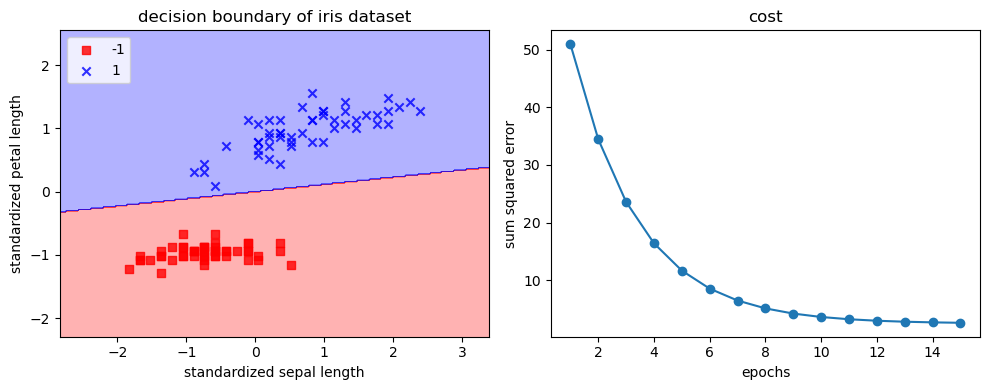

In [18]:
# feature standardization
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
ada = AdalineGD(lr=0.01, epochs=15)
ada.fit(X_std, y)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plot_decision_boundary(X_std, y, classifier=ada)
plt.title("decision boundary of iris dataset")
plt.xlabel("standardized sepal length")
plt.ylabel("standardized petal length")
plt.legend(loc="upper left")
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.title("cost")
plt.xlabel("epochs")
plt.ylabel("sum squared error")
plt.tight_layout()
plt.show()

create **AdalineSGD** API using python class. stochastic gradient descent updates weights based on each single sample.

In [19]:
class AdalineSGD(object):
    """
    lr: learning rate
    epochs: number of iterations
    shuffle: shuffle the dataset
    random_state: seed
    """
    def __init__(self, lr=0.01, epochs=50, shuffle=True, random_state=1):
        self.lr = lr
        self.epochs = epochs
        self.shuffle = shuffle
        self.random_state = random_state
        self.w_initialized = False

    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for _ in range(self.epochs):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.lr * xi.dot(error)
        self.w_[0] += self.lr * error
        cost = 0.5 * (error**2)
        return cost

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

train AdalineSGD model and visualize its training result and decision boundary using `plot_decision_boundary()`.

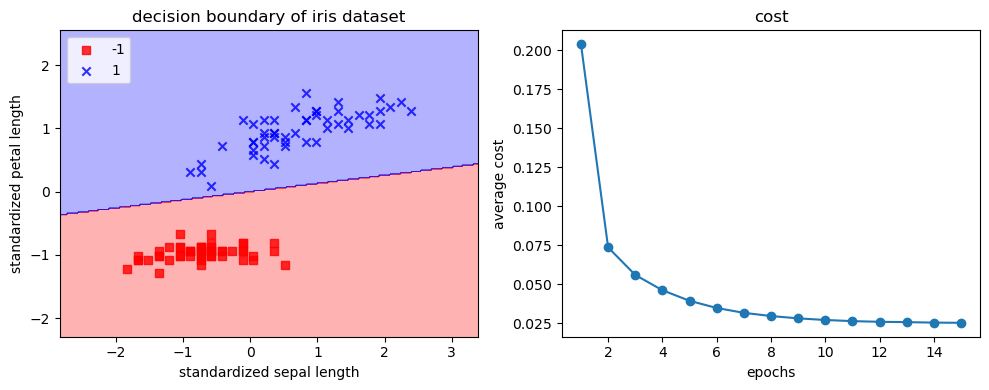

In [20]:
ada = AdalineSGD(lr=0.01, epochs=15)
ada.fit(X_std, y)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plot_decision_boundary(X_std, y, classifier=ada)
plt.title("decision boundary of iris dataset")
plt.xlabel("standardized sepal length")
plt.ylabel("standardized petal length")
plt.legend(loc="upper left")
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.title('cost')
plt.xlabel('epochs')
plt.ylabel('average cost')
plt.tight_layout()
plt.show()

so, AdalineSGD model is much faster than AdalineGD in terms of the speed of cost convergence (i.e. find the global minimum of the cost function). AdalineSGD frequently updates the weights than AdalineGD (single sample vs. the entire dataset).